# using Decision Tree 

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reg_method= ['Decision Tree one level', 
            'Decision Tree multi level optimized', 
            'Forest regression', 
            'Linear model']
def print_model_performance(model, y, prediction, reg_method_id):
    # print ('coeffecient:', model.coef_)
    # print ('intercept: ', model.intercept_)

    print (f'Mean squared Error (MSE): {mean_squared_error(y, prediction):.2f}')
    print (f'Mean absolute Error (MAE): {mean_absolute_error(y, prediction):.2f}')
    print (f'Coeffecint of determination (R2): {r2_score(y, prediction):.2f}')
    # plt.figure()
    # p= sns.regplot(x=y, y=prediction, marker = '+')
    # p= p.set_title(reg_method[reg_method_id])
    

In [3]:
def reg_4_models(train_X, val_X, train_y, val_y, y_col):
    reg_fns = [reg_decision_tree_1, 
                    reg_decision_tree_max_leaf,
                    use_forest_regression,
                    use_linear_model] 
    all_reg = pd.DataFrame()
    for reg_model_id in range(4):
        print (20*'*', reg_method[reg_model_id],20*'*' )
        pred = reg_fns[reg_model_id](train_X, val_X, train_y, val_y)
        x = pd.DataFrame(val_y)
        x['predicted'] = pred
        x['Method'] = reg_method[reg_model_id]
        all_reg = pd.concat([all_reg, x])

    plt_one_graph(all_reg, y_col, 'Method')
    

In [4]:
def plt_one_graph(df, pivot, y_col):

    g = sns.FacetGrid(data=df, col=pivot, col_wrap=2)
    g.map(sns.regplot, y_col, 'predicted',  marker = '+')

# Regression Models

## Use Decision Tree Regression - One leaf

In [5]:
def reg_decision_tree_1(train_X, val_X, train_y, val_y):
    # Specify Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    # print("Validation MAE: {:,.0f}".format(val_mae))
    print_model_performance(iowa_model, val_y, val_predictions, 0)
    return val_predictions


## Use Decision Tree with optimizating max_leaf_nodes

In [6]:
# model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [7]:
def reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y):
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    mae=[]
    for i, max_leaf in enumerate(candidate_max_leaf_nodes):
        #print (i, max_leaf)
        x = get_mae(max_leaf, train_X, val_X, train_y, val_y)
        mae.append(x)
        print(f"Max leaf nodes: {max_leaf}  \t\t Mean Absolute Error:  {x:.2f}")
        
    # Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
    m = mae.index(min(mae))
    best_tree_size = candidate_max_leaf_nodes[m]

    final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
    # fit the final model 
    final_model.fit(X, y)
    pred = final_model.predict(val_X)
    print_model_performance(final_model, val_y, pred, 1)
    return pred

## Use Random Forest regression model

In [8]:

# from sklearn.metrics import mean_absolute_error
def use_forest_regression(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    print_model_performance(forest_model, val_y, melb_preds, 2)
    return melb_preds

## Use Linear model regression

In [9]:
def use_linear_model(train_X, eval_X, train_y, eval_y):
    model = linear_model.LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)
    print_model_performance(model, eval_y, pred,3)
    # print ('Mead squared Error (MSE):', mean_squared_error(val_y, pred))
    return pred

# Regression analysis of "train data set" using 4 methods

******************** Decision Tree one level ********************
Mean squared Error (MSE): 2025868189.95
Mean absolute Error (MAE): 30642.67
Coeffecint of determination (R2): 0.72
******************** Decision Tree multi level optimized ********************
Max leaf nodes: 5  		 Mean Absolute Error:  35436.69
Max leaf nodes: 25  		 Mean Absolute Error:  29324.03
Max leaf nodes: 50  		 Mean Absolute Error:  28003.22
Max leaf nodes: 100  		 Mean Absolute Error:  27803.24
Max leaf nodes: 250  		 Mean Absolute Error:  29711.62
Max leaf nodes: 500  		 Mean Absolute Error:  30400.68
Mean squared Error (MSE): 482784434.77
Mean absolute Error (MAE): 17039.20
Coeffecint of determination (R2): 0.93
******************** Forest regression ********************
Mean squared Error (MSE): 1043035168.11
Mean absolute Error (MAE): 22255.86
Coeffecint of determination (R2): 0.85
******************** Linear model ********************
Mean squared Error (MSE): 1686400354.60
Mean absolute Error (MAE): 2782

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U35'), dtype('float64')) -> None

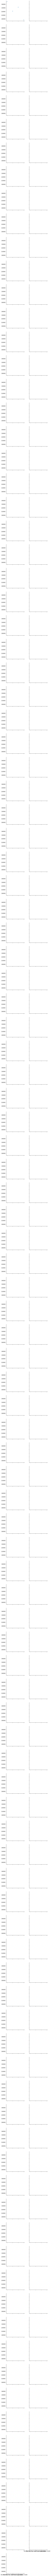

In [10]:
iowa_file_path = r"C:\Yahia\Python\ML\data\train.csv"
home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

reg_4_models(train_X, val_X, train_y, val_y,'SalePrice')


In [ ]:
X

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


# Regression Analysis of "Boston House data" 

******************** Decision Tree one level ********************
Mean squared Error (MSE): 31.99
Mean absolute Error (MAE): 3.42
Coeffecint of determination (R2): 0.68
******************** Decision Tree multi level optimized ********************
Max leaf nodes: 5  		 Mean Absolute Error:  3.52
Max leaf nodes: 25  		 Mean Absolute Error:  2.76
Max leaf nodes: 50  		 Mean Absolute Error:  2.96
Max leaf nodes: 100  		 Mean Absolute Error:  2.89
Max leaf nodes: 250  		 Mean Absolute Error:  3.01
Max leaf nodes: 500  		 Mean Absolute Error:  3.01
Mean squared Error (MSE): 1.36
Mean absolute Error (MAE): 0.95
Coeffecint of determination (R2): 0.99
******************** Forest regression ********************
Mean squared Error (MSE): 8.92
Mean absolute Error (MAE): 2.35
Coeffecint of determination (R2): 0.91
******************** Linear model ********************
Mean squared Error (MSE): 23.38
Mean absolute Error (MAE): 3.75
Coeffecint of determination (R2): 0.76


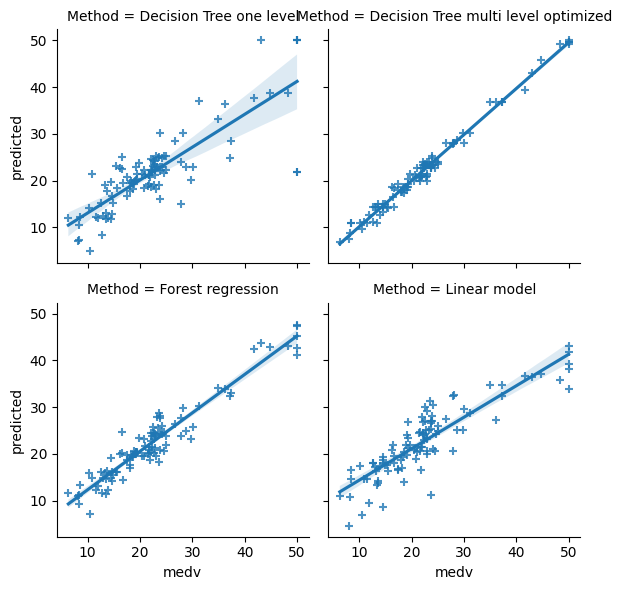

In [ ]:
file_path = r"C:\Yahia\Python\ML\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

reg_4_models(train_X, val_X, train_y, val_y, 'medv')

************ Decision Tree one level ***************
Mean squared Error (MSE): 31.99
Mean absolute Error (MAE): 3.42
Coeffecint of determination (R2): 0.68

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  3.52
Max leaf nodes: 25  		 Mean Absolute Error:  2.76
Max leaf nodes: 50  		 Mean Absolute Error:  2.96
Max leaf nodes: 100  		 Mean Absolute Error:  2.89
Max leaf nodes: 250  		 Mean Absolute Error:  3.01
Max leaf nodes: 500  		 Mean Absolute Error:  3.01
Mean squared Error (MSE): 1.36
Mean absolute Error (MAE): 0.95
Coeffecint of determination (R2): 0.99

************ User Forest model regression ***************
Mean squared Error (MSE): 8.92
Mean absolute Error (MAE): 2.35
Coeffecint of determination (R2): 0.91

************ Linear Model ***************
Mean squared Error (MSE): 23.38
Mean absolute Error (MAE): 3.75
Coeffecint of determination (R2): 0.76


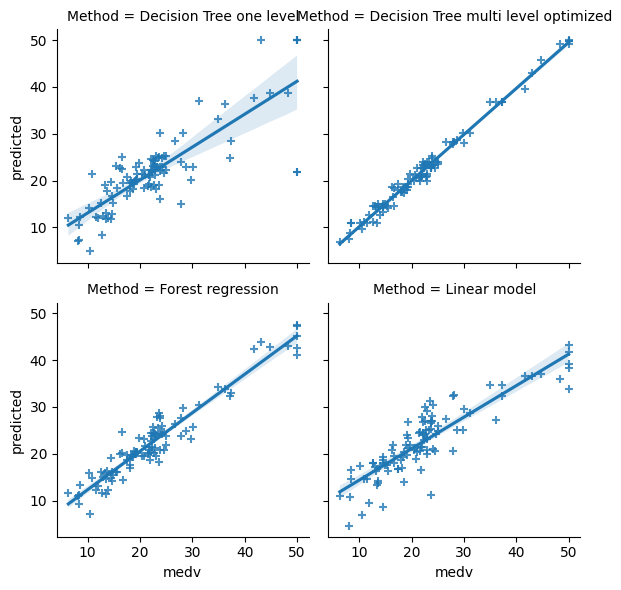

In [ ]:
file_path = r"C:\Yahia\Python\ML\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

print ('************ Decision Tree one level ***************')
pred = reg_decision_tree_1(train_X, val_X, train_y, val_y)
all_reg = pd.DataFrame(val_y)
all_reg['pred'] = pred
all_reg['id'] = reg_method[0]
print ('\n************ Decision Tree multi level optimized ***************')
pred = reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[1]
all_reg = pd.concat([all_reg, x])

print ('\n************ User Forest model regression ***************')
pred = use_forest_regression(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[2]
all_reg = pd.concat([all_reg, x])

print ('\n************ Linear Model ***************')
pred = use_linear_model(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[3]
all_reg = pd.concat([all_reg, x])
all_reg.columns = ['medv', 'predicted', 'Method']
plt_one_graph(all_reg, 'Method')

# Diabetes data set from skilearn

X.shape: (442, 10)  y.shape: (442,)
************ Decision Tree one level ***************
Mean squared Error (MSE): 5843.35
Mean absolute Error (MAE): 57.42
Coeffecint of determination (R2): 0.22

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  54.87577772531823
Max leaf nodes: 25  		 Mean Absolute Error:  54.91656073835447
Max leaf nodes: 50  		 Mean Absolute Error:  50.71513136526776
Max leaf nodes: 100  		 Mean Absolute Error:  53.31326912787587
Max leaf nodes: 250  		 Mean Absolute Error:  55.20181915462815
Max leaf nodes: 500  		 Mean Absolute Error:  55.48314606741573
Mean squared Error (MSE): 509.47
Mean absolute Error (MAE): 17.81
Coeffecint of determination (R2): 0.93

************ User Forest model regression ***************
Mean squared Error (MSE): 3927.78
Mean absolute Error (MAE): 52.92
Coeffecint of determination (R2): 0.47

************ Linear Model ***************
Mean squared Error (MSE): 3788.94
Mean absolut

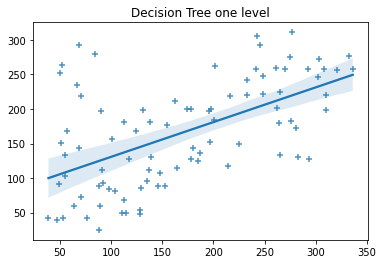

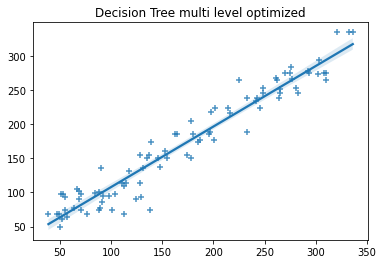

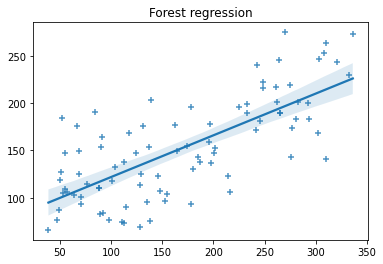

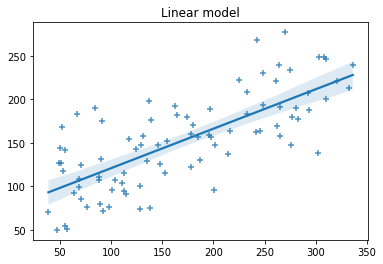

In [ ]:
from sklearn import datasets

# diabetes = datasets.load_diabetes(return_X_y=True)
diabetes = datasets.load_diabetes()
y = diabetes.target
X = diabetes.data

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ("X.shape:", X.shape, " y.shape:", y.shape)
print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)


In [ ]:
diabetes